In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "veneto"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,5,Veneto,12,7,19,23,42,10,10,...,0.0,1580.0,0.0,7.0,36.84,45.24,0.63,0.00,75.00,31.25
1,2020-02-26T18:00:00,5,Veneto,16,8,24,45,69,27,28,...,1.0,1120.0,0.0,22.0,33.33,34.78,2.50,0.00,14.29,64.29
2,2020-02-27T18:00:00,5,Veneto,19,8,27,82,109,40,40,...,0.0,1264.0,0.0,37.0,29.63,24.77,3.16,0.00,0.00,57.97
3,2020-02-28T18:00:00,5,Veneto,24,9,33,116,149,40,40,...,0.0,1250.0,0.0,34.0,27.27,22.15,3.20,0.00,12.50,36.70
4,2020-02-29T17:00:00,5,Veneto,24,11,35,154,189,40,40,...,0.0,1245.0,0.0,38.0,31.43,18.52,3.21,0.00,22.22,26.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2020-12-03T17:00:00,5,Veneto,2501,307,2808,67795,70603,1811,3581,...,95.0,21636.0,6507.0,1830.0,10.93,3.98,16.55,55.03,-0.32,2.63
283,2020-12-04T17:00:00,5,Veneto,2477,309,2786,70143,72929,2326,3708,...,83.0,12993.0,4247.0,2348.0,11.09,3.82,28.54,87.31,0.65,3.29
284,2020-12-05T17:00:00,5,Veneto,2489,312,2801,72157,74958,2029,3607,...,108.0,16386.0,4863.0,2014.0,11.14,3.74,22.01,74.17,0.97,2.78
285,2020-12-06T17:00:00,5,Veneto,2508,308,2816,73988,76804,1846,3444,...,37.0,14418.0,4471.0,1831.0,10.94,3.67,23.89,77.03,-1.28,2.46


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2550
Nuovi tamponi: 9263.0
Percentuale nuovi positivi/nuovi tamponi: 27.500000000000004 %
Nuovi guariti: 1002.0
Nuovi deceduti: 51.0
Variazione positivi ricoverati con sintomi: 21.0
Variazione positivi in terapia intensiva: 9.0
Variazione positivi in isolamento dimiciliare: 1467.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-08T17:00:00,5,Veneto,213,19,232,4851,5083,329,491,...,6.0,16958.0,6540.0,327.0,8.19,4.56,2.90,7.51,18.75,6.92
1,2020-10-09T17:00:00,5,Veneto,208,21,229,5245,5474,391,595,...,3.0,14325.0,5323.0,394.0,9.17,4.18,4.15,11.18,10.53,7.69
2,2020-10-10T17:00:00,5,Veneto,231,20,251,5581,5832,358,561,...,7.0,14996.0,5488.0,336.0,7.97,4.30,3.74,10.22,-4.76,6.54
3,2020-10-11T17:00:00,5,Veneto,238,24,262,5826,6088,256,438,...,2.0,11140.0,4404.0,245.0,9.16,4.30,3.93,9.95,20.00,4.39
4,2020-10-12T17:00:00,5,Veneto,244,29,273,6016,6289,201,328,...,1.0,6348.0,2503.0,190.0,10.62,4.34,5.17,13.10,20.83,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-03T17:00:00,5,Veneto,2501,307,2808,67795,70603,1811,3581,...,95.0,21636.0,6507.0,1830.0,10.93,3.98,16.55,55.03,-0.32,2.63
57,2020-12-04T17:00:00,5,Veneto,2477,309,2786,70143,72929,2326,3708,...,83.0,12993.0,4247.0,2348.0,11.09,3.82,28.54,87.31,0.65,3.29
58,2020-12-05T17:00:00,5,Veneto,2489,312,2801,72157,74958,2029,3607,...,108.0,16386.0,4863.0,2014.0,11.14,3.74,22.01,74.17,0.97,2.78
59,2020-12-06T17:00:00,5,Veneto,2508,308,2816,73988,76804,1846,3444,...,37.0,14418.0,4471.0,1831.0,10.94,3.67,23.89,77.03,-1.28,2.46


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

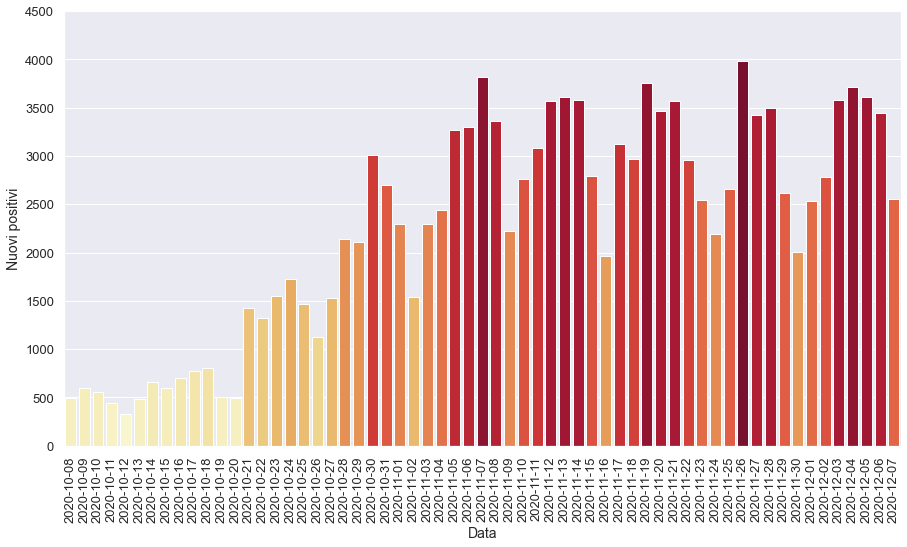

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

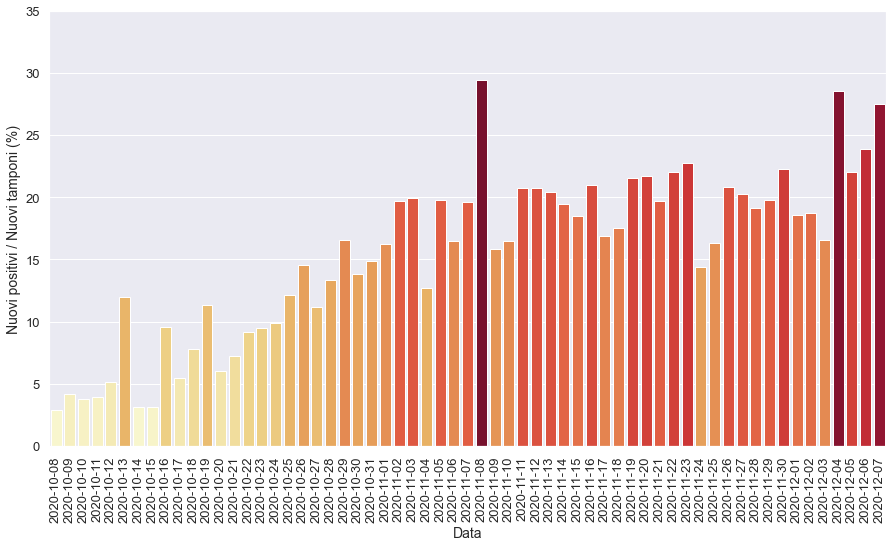

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

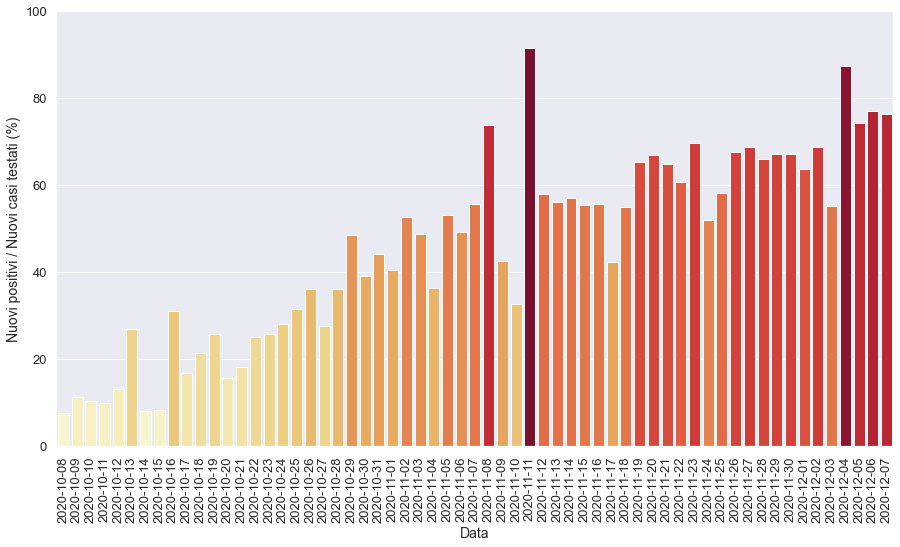

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

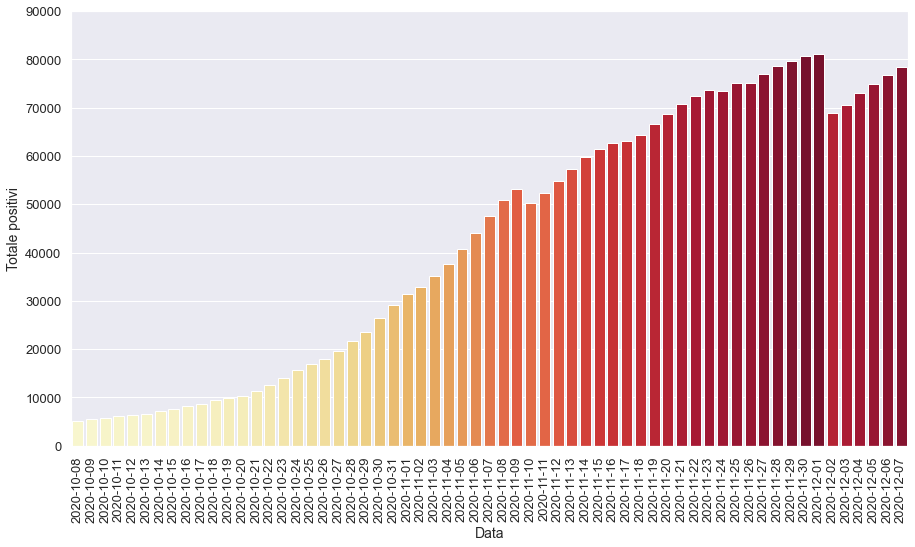

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

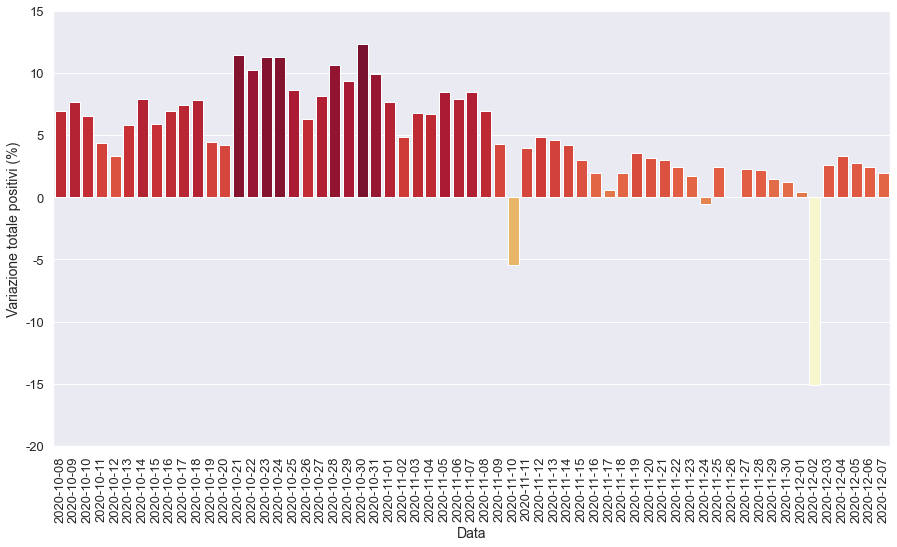

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

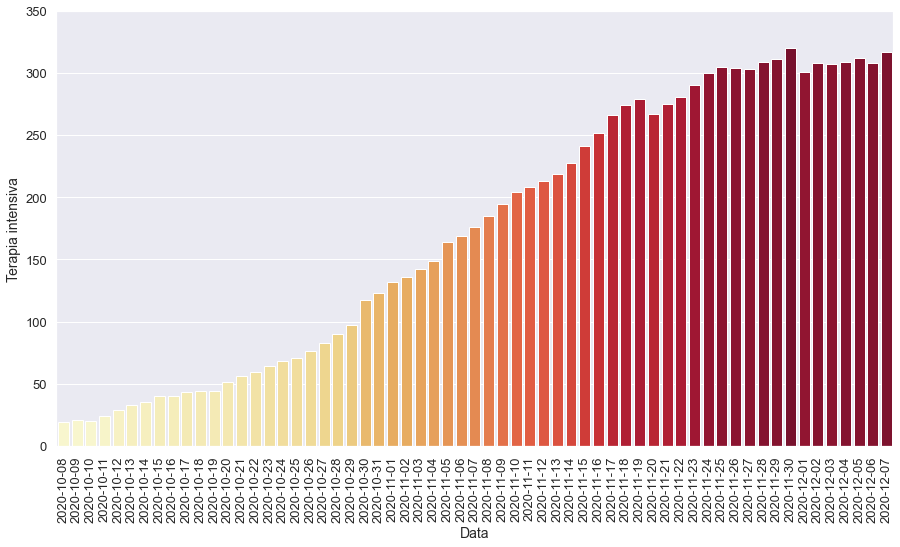

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

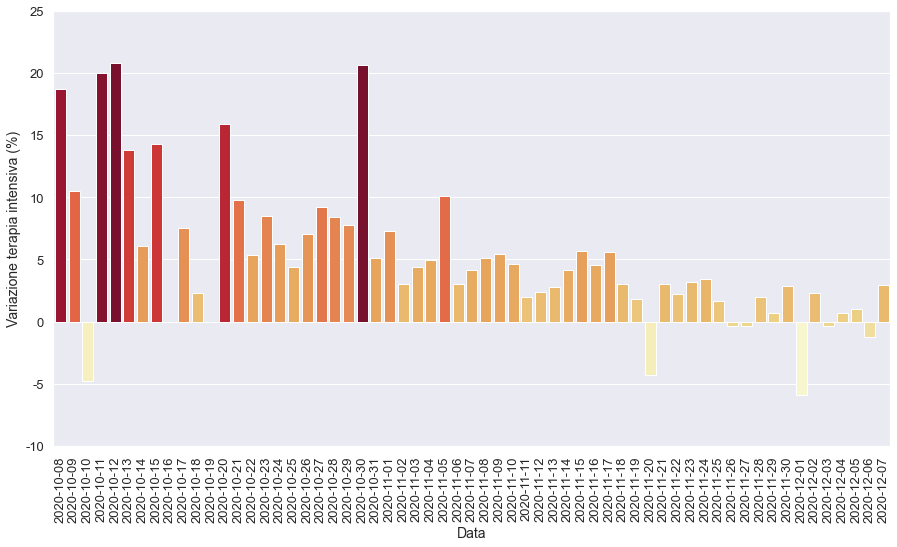

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

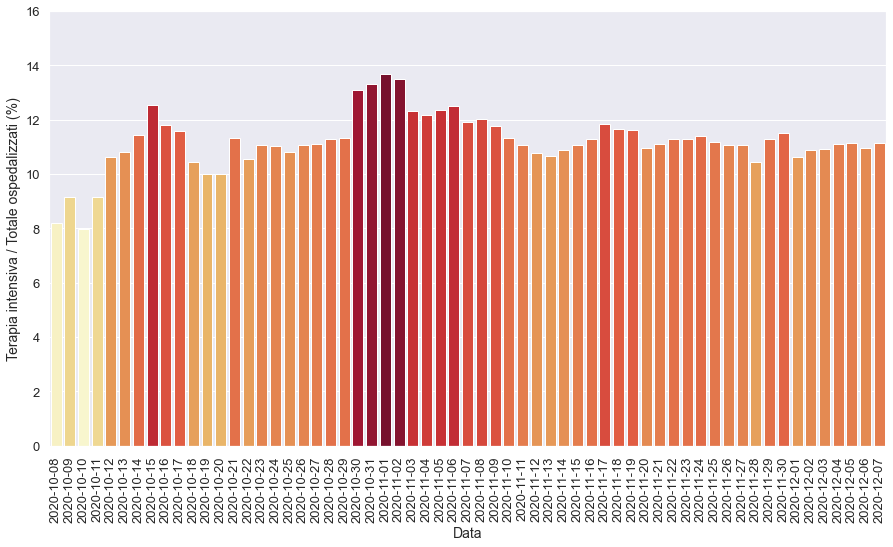

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

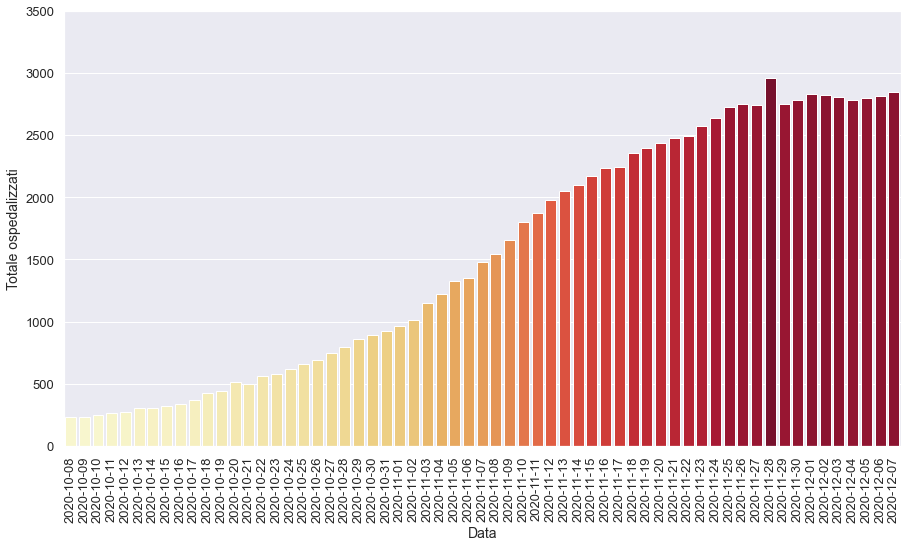

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

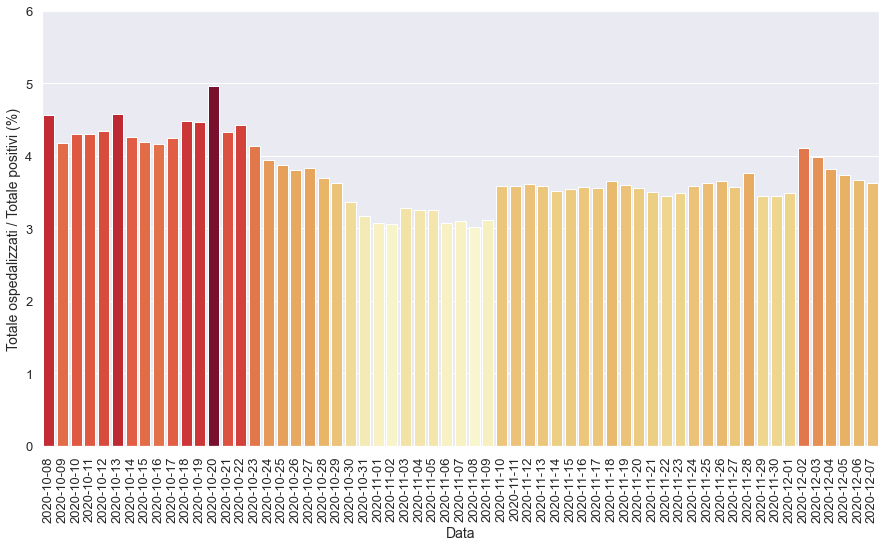

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

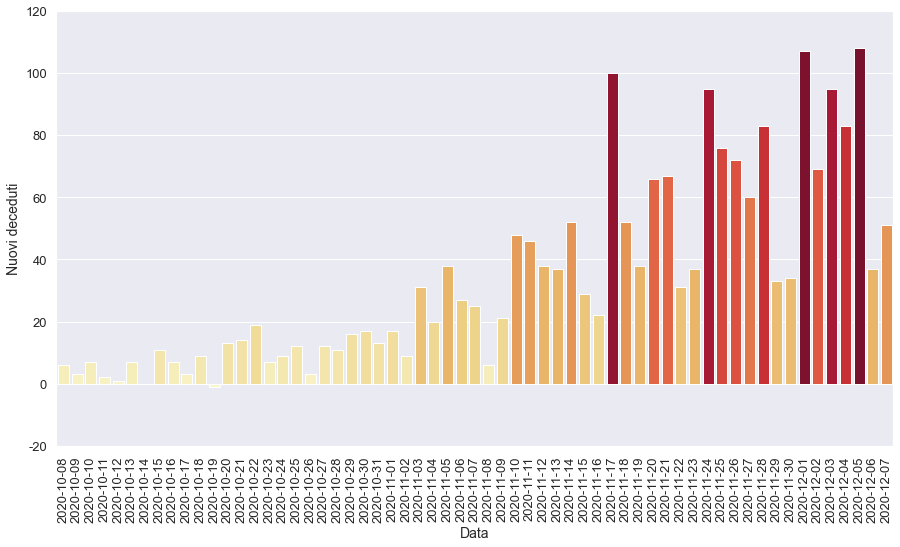

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

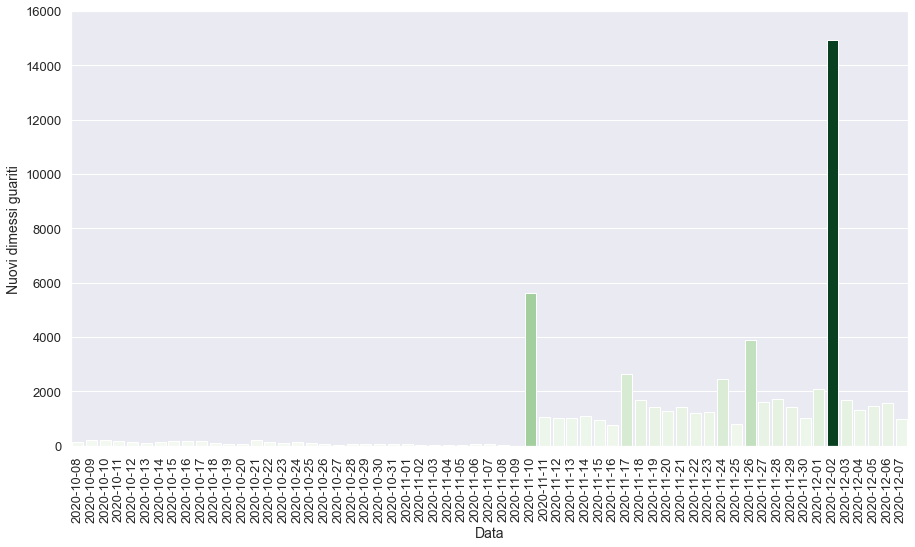

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-07T17:00:00,5,Veneto,1300,176,1476,46181,47657,3720,3815,...,25.0,19420.0,6863.0,3597.0,11.92,3.10,19.64,55.59,4.14,8.47
1,2020-11-08T17:00:00,5,Veneto,1355,185,1540,49430,50970,3313,3362,...,6.0,11423.0,4558.0,3249.0,12.01,3.02,29.43,73.76,5.11,6.95
2,2020-11-09T17:00:00,5,Veneto,1464,195,1659,51503,53162,2192,2223,...,21.0,14026.0,5235.0,2073.0,11.75,3.12,15.85,42.46,5.41,4.30
3,2020-11-10T17:00:00,5,Veneto,1596,204,1800,48450,50250,-2912,2763,...,48.0,16778.0,8453.0,-3053.0,11.33,3.58,16.47,32.69,4.62,-5.48
4,2020-11-11T17:00:00,5,Veneto,1669,208,1877,50358,52235,1985,3082,...,46.0,14843.0,3372.0,1908.0,11.08,3.59,20.76,91.40,1.96,3.95
5,2020-11-12T17:00:00,5,Veneto,1763,213,1976,52779,54755,2520,3564,...,38.0,17211.0,6146.0,2421.0,10.78,3.61,20.71,57.99,2.40,4.82
6,2020-11-13T17:00:00,5,Veneto,1831,219,2050,55238,57288,2533,3605,...,37.0,17644.0,6421.0,2459.0,10.68,3.58,20.43,56.14,2.82,4.63
7,2020-11-14T17:00:00,5,Veneto,1869,228,2097,57608,59705,2417,3578,...,52.0,18404.0,6279.0,2370.0,10.87,3.51,19.44,56.98,4.11,4.22
8,2020-11-15T17:00:00,5,Veneto,1934,241,2175,59331,61506,1801,2792,...,29.0,15122.0,5036.0,1723.0,11.08,3.54,18.46,55.44,5.70,3.02
9,2020-11-16T17:00:00,5,Veneto,1985,252,2237,60461,62698,1192,1966,...,22.0,9357.0,3542.0,1130.0,11.27,3.57,21.01,55.51,4.56,1.94


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

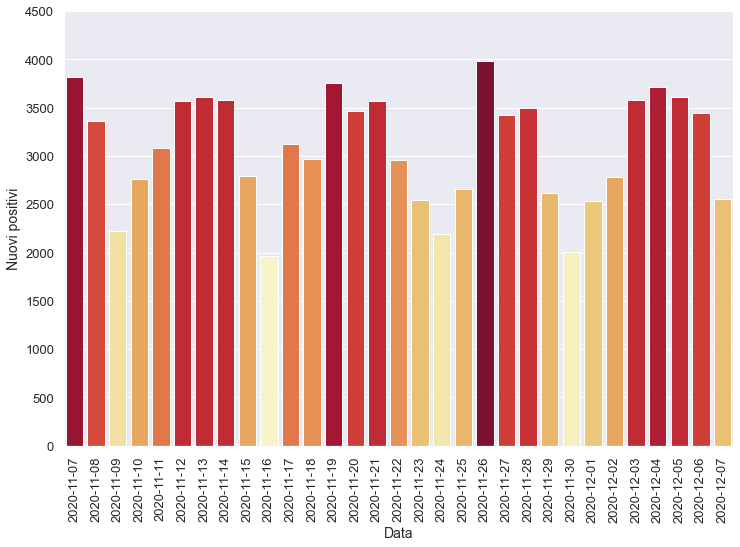

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

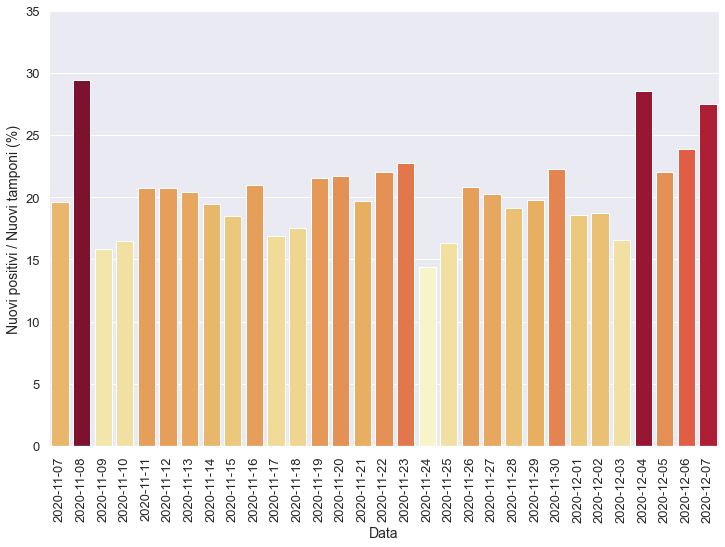

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

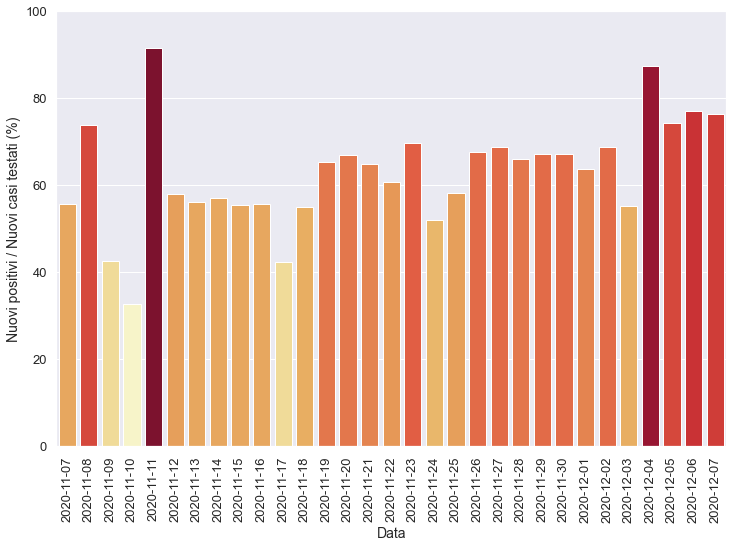

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

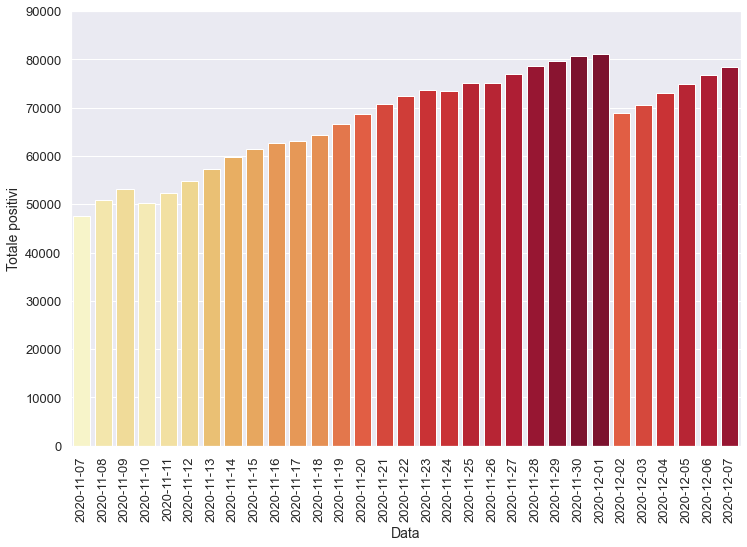

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

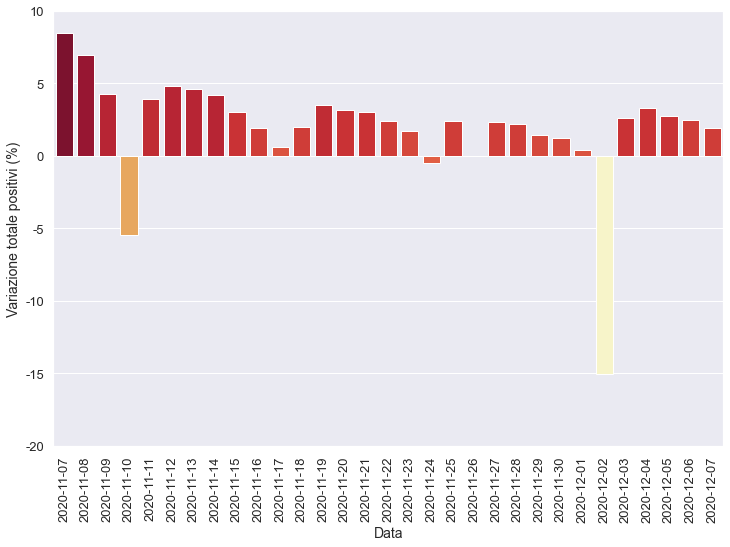

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

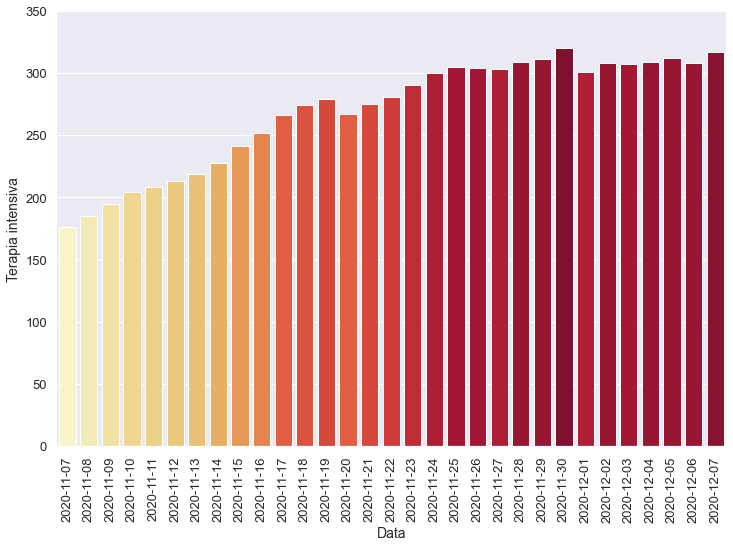

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

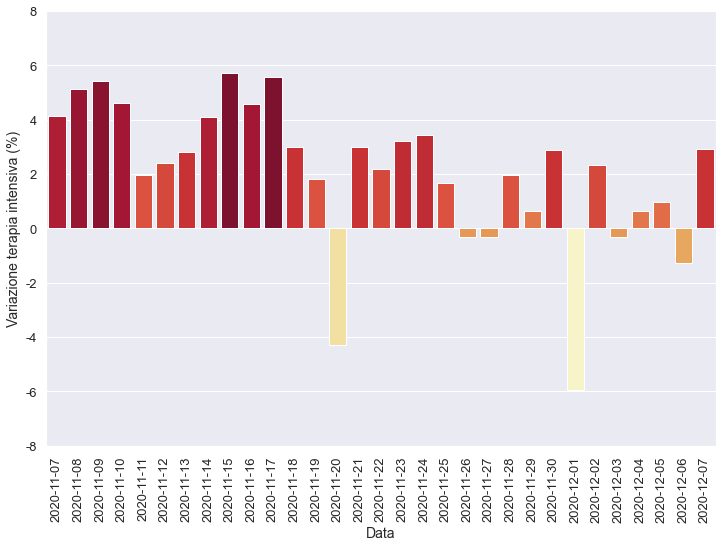

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

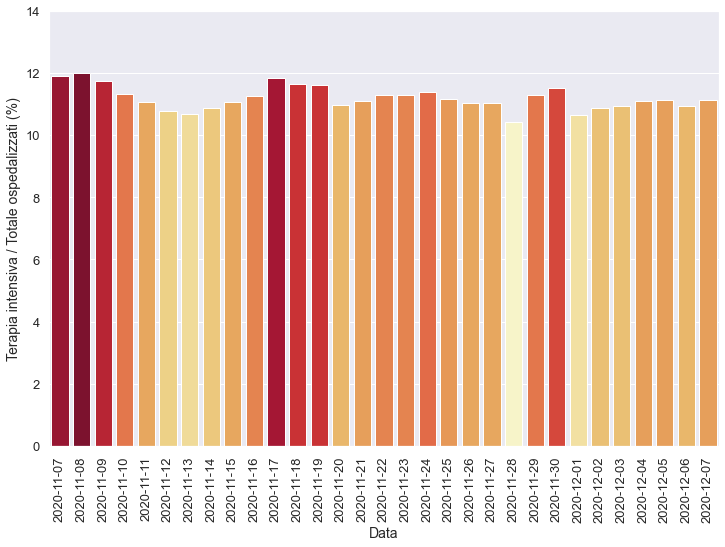

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

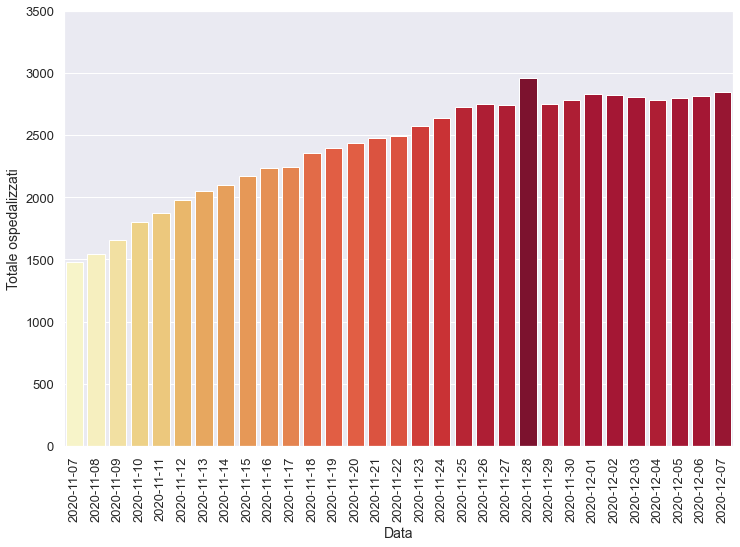

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

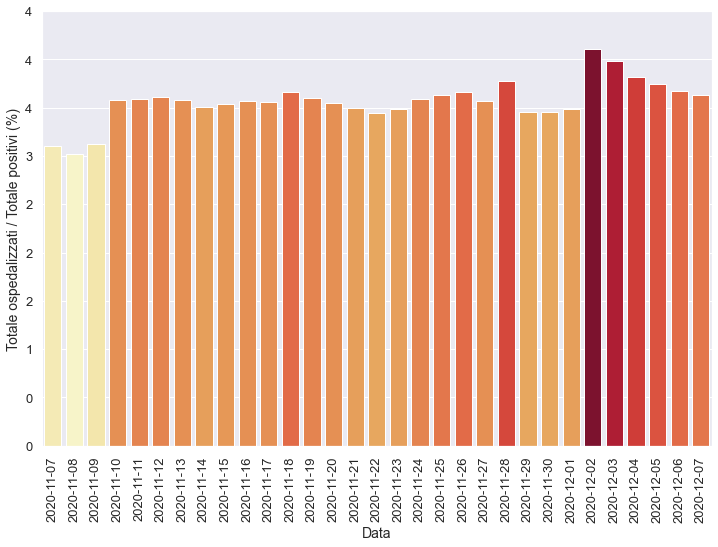

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

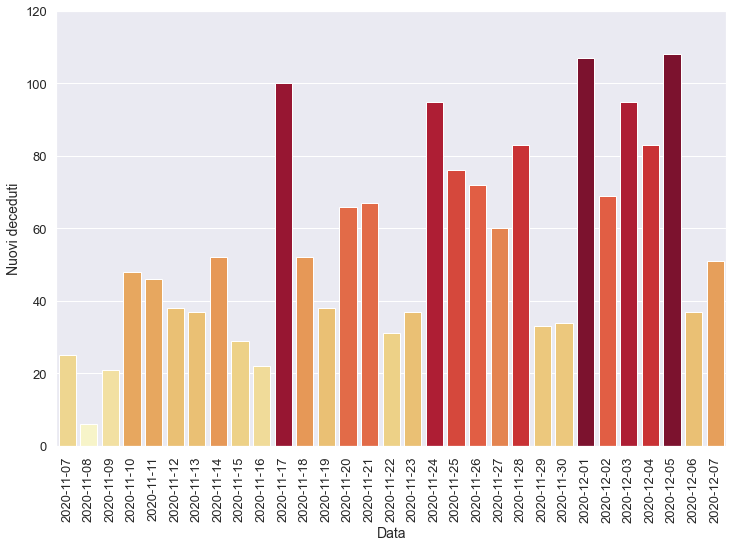

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

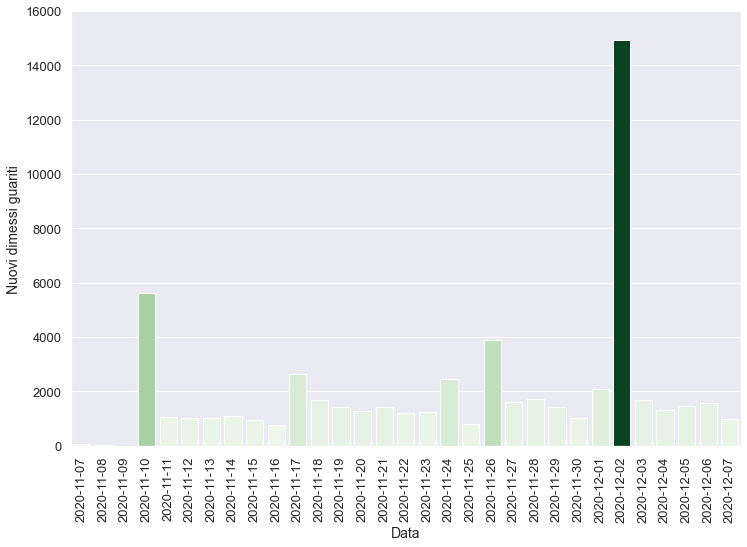

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-30T17:00:00,5,Veneto,2460,320,2780,77885,80665,954,2003,...,34.0,8985.0,2983.0,927.0,11.51,3.45,22.29,67.15,2.89,1.20
1,2020-12-01T17:00:00,5,Veneto,2527,301,2828,78169,80997,332,2535,...,107.0,13659.0,3986.0,284.0,10.64,3.49,18.56,63.60,-5.94,0.41
2,2020-12-02T17:00:00,5,Veneto,2519,308,2827,65965,68792,-12205,2782,...,69.0,14847.0,4048.0,-12204.0,10.89,4.11,18.74,68.73,2.33,-15.07
3,2020-12-03T17:00:00,5,Veneto,2501,307,2808,67795,70603,1811,3581,...,95.0,21636.0,6507.0,1830.0,10.93,3.98,16.55,55.03,-0.32,2.63
4,2020-12-04T17:00:00,5,Veneto,2477,309,2786,70143,72929,2326,3708,...,83.0,12993.0,4247.0,2348.0,11.09,3.82,28.54,87.31,0.65,3.29
5,2020-12-05T17:00:00,5,Veneto,2489,312,2801,72157,74958,2029,3607,...,108.0,16386.0,4863.0,2014.0,11.14,3.74,22.01,74.17,0.97,2.78
6,2020-12-06T17:00:00,5,Veneto,2508,308,2816,73988,76804,1846,3444,...,37.0,14418.0,4471.0,1831.0,10.94,3.67,23.89,77.03,-1.28,2.46
7,2020-12-07T17:00:00,5,Veneto,2529,317,2846,75455,78301,1497,2550,...,51.0,9263.0,3342.0,1467.0,11.14,3.63,27.53,76.30,2.92,1.95


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

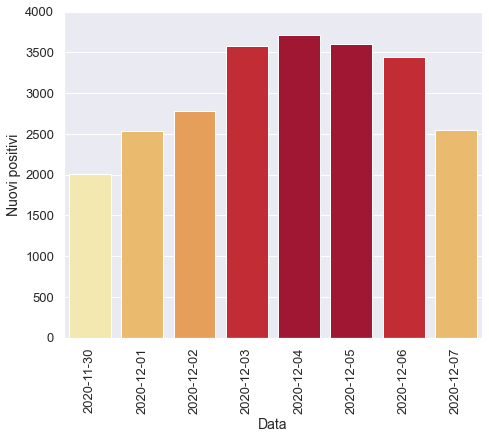

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

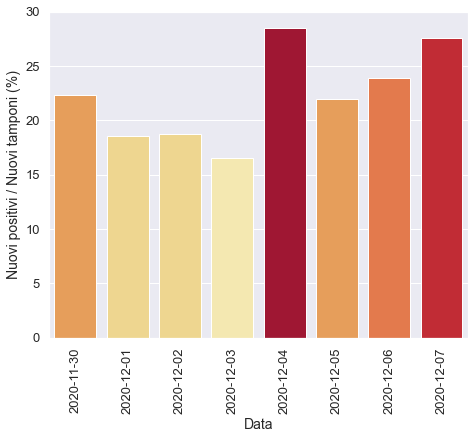

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

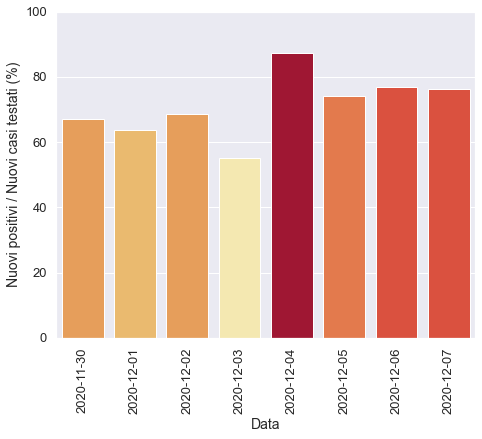

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

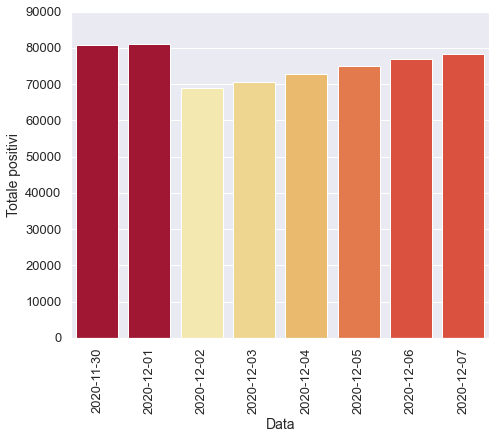

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

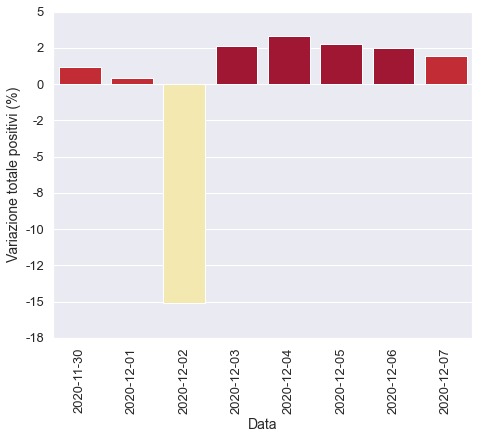

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

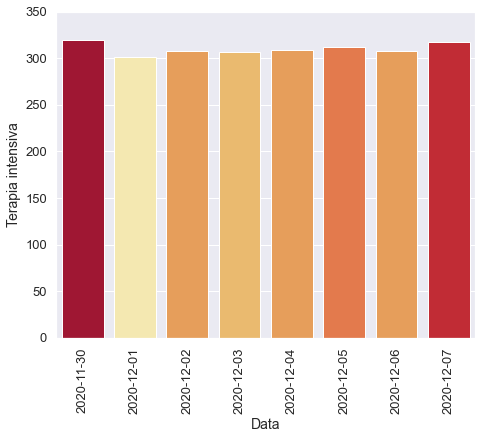

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

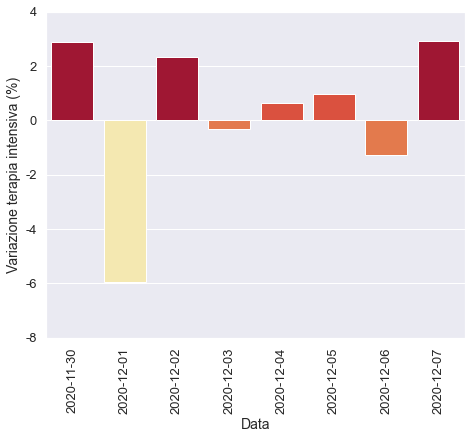

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

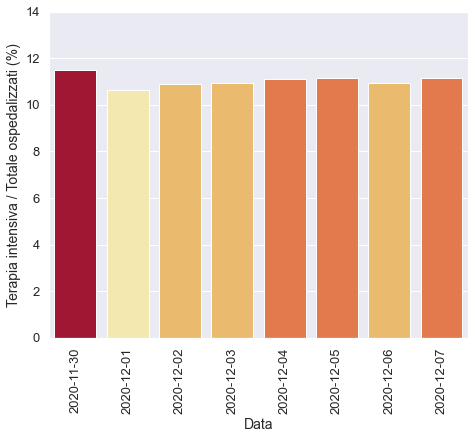

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

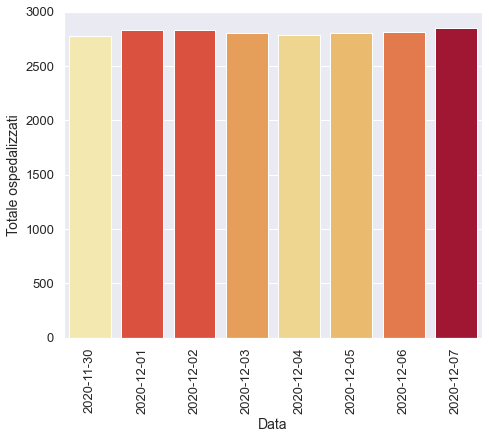

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

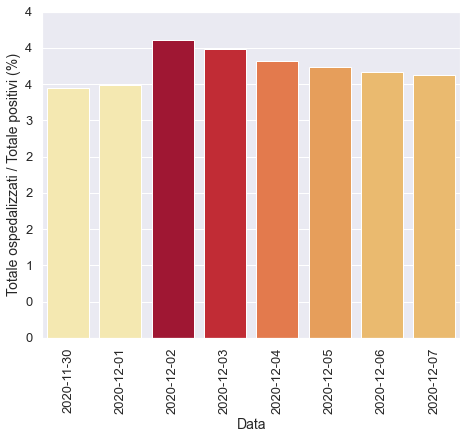

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

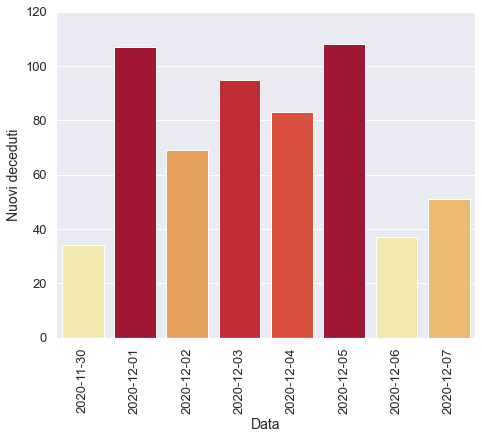

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

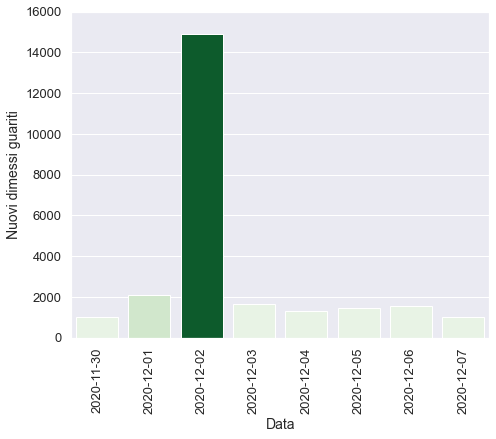

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)